In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [5]:
df = pd.read_csv('titanic_toy.csv')

In [7]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [11]:
df.isnull().mean() *100 # Missing Data in percentage

Age         19.865320
Fare         5.050505
Family       0.000000
Survived     0.000000
dtype: float64

In [13]:
X = df.drop(columns = ['Survived'])
y=df['Survived']

In [15]:
X_train, X_test,y_train,y_test = train_test_split( X , y  , test_size = 0.2 , random_state = 2)

In [17]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

In [19]:
X_train.isnull().mean() * 100

Age       20.786517
Fare       5.056180
Family     0.000000
dtype: float64

In [21]:
X_test.isnull().mean() * 100

Age       16.201117
Fare       5.027933
Family     0.000000
dtype: float64

In [23]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [25]:
mean_age, mean_fare,median_age , median_fare

(29.78590425531915, 32.61759689349112, 28.75, 14.4583)

In [27]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)


X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)
X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)

In [29]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
351,NaN,35.0000,0,28.75,29.785904,35.0000,35.0000
125,12.0,11.2417,1,12.00,12.000000,11.2417,11.2417
839,NaN,29.7000,0,28.75,29.785904,29.7000,29.7000
750,4.0,23.0000,2,4.00,4.000000,23.0000,23.0000
665,32.0,73.5000,2,32.00,32.000000,73.5000,73.5000


In [31]:
# Variance before and after imputation for 'Age' ------------------------------------------------------->
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())


# Variance before and after imputation for 'Fare' -------------------------------------------------------->
print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())


Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2448.197913706318
Fare Variance after median imputation:  2340.0910219753637
Fare Variance after mean imputation:  2324.2385256705547


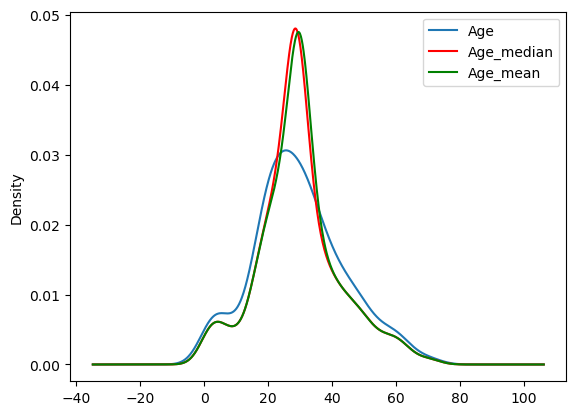

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Age'].plot(kind ='kde' , ax = ax)

# Variable imputed with the median
X_train['Age_median'].plot(kind ='kde' , ax = ax , color ='red')

# Variable imputed with the mean
X_train['Age_mean'].plot(kind ='kde' , ax = ax , color = 'green')

# add legends -------------------------------------->
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

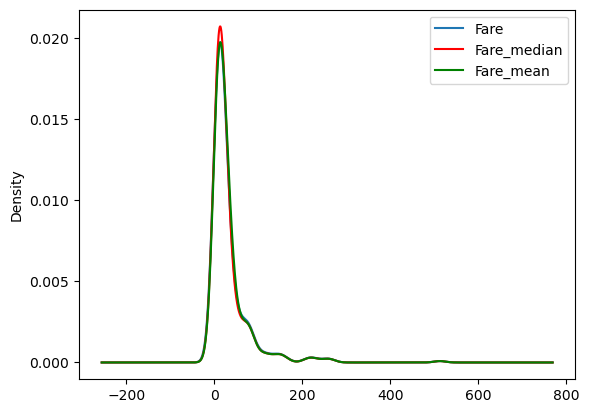

In [35]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Original Variable Distribution
X_train['Fare'].plot(kind ='kde' , ax = ax)

# Variable imputed with the median
X_train['Fare_median'].plot(kind ='kde' , ax = ax , color ='red')

# Variable imputed with the mean
X_train['Fare_mean'].plot(kind ='kde' , ax = ax , color = 'green')

# add legends -------------------------------------->
lines , labels = ax.get_legend_handles_labels()
ax.legend(lines , labels , loc = 'best')

In [37]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_mean,Fare_median
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.665205,64.858859
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.385048,16.476305
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,55.023037,53.553455
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.788341,51.358000
Fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526
Fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2324.238526,2340.091022


<Axes: >

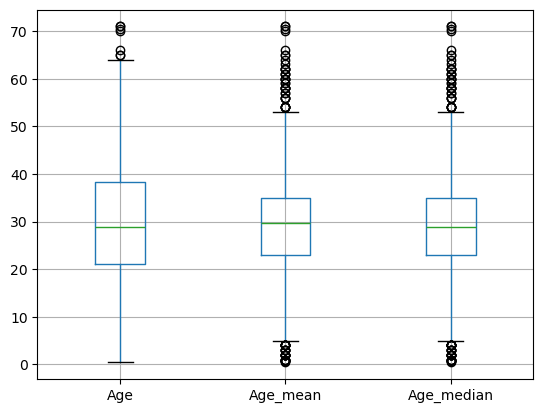

In [45]:
X_train[['Age' , 'Age_mean' , 'Age_median']].boxplot()

<Axes: >

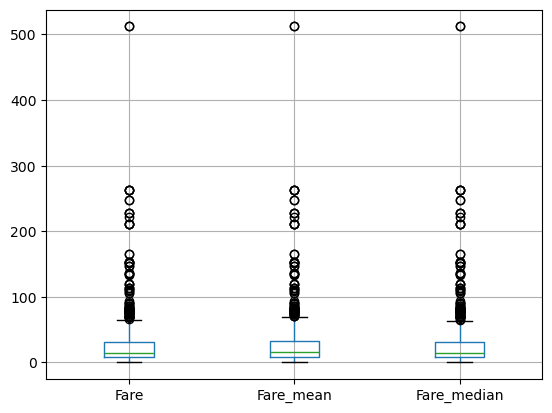

In [41]:
X_train[['Fare' , 'Fare_mean' , 'Fare_median']].boxplot()

# Using Sklearn -------------------------->

In [43]:
X_train, X_test,y_train,y_test = train_test_split( X , y  , test_size = 0.2 , random_state = 2)

In [65]:
imputer1 = SimpleImputer(strategy ='median')
imputer2 = SimpleImputer(strategy ='mean')

In [67]:
 trf = ColumnTransformer([
     ('imputer1', imputer1, ['Age']),
     ('imputer2', imputer2, ['Fare'])
 ], remainder = 'passthrough')

In [71]:
trf.fit(X_train)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [73]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [75]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [77]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [79]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])